# Memprediksi Hujan di Australia

#pada final project kedua ini peserta diharapkan mampu membuat sebuah model yang dapat memprediksi terjadinya hujan di australia. data yang digunakan berasal dari kaggle yang memiliki 23 atribut dengan kolom RainTomorrow adalah target variable yang akan diprediksi. Jika “Yes” maka besok harinya disana hujan 1mm atau lebih.

# Import packgae yang diperlukan

In [1]:
#melakukan import package yang diperlukan
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Data Loading

In [2]:
#Data loading
data = pd.read_csv("weatherAUS.csv")

In [3]:
#Melihat 5 data teratas
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#melihat semua nama column yang
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
#Melihat lebih detail dari data yang ada
data.describe

<bound method NDFrame.describe of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN          

# Data Cleaning
membersihkan data dari missing value atau memberi nama baru untuk kolom

In [6]:
#Data Cleaning
column =["Rainfall","Sunshine","WindDir9am","WindDir3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm","RainToday","RainTomorrow"]

In [7]:
data_set = data[column]
data_set.head()

,Rainfall,Sunshine,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.6,NaN,W,WNW,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,0.0,NaN,NNW,WSW,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,0.0,NaN,W,WSW,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,0.0,NaN,SE,E,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,1.0,NaN,ENE,NW,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
#Melihat jumlah data yang kosong
data_set.isnull().sum()

Rainfall         3261
Sunshine        69835
WindDir9am      10566
WindDir3pm       4228
Humidity9am      2654
Humidity3pm      4507
Pressure9am     15065
Pressure3pm     15028
Cloud9am        55888
Cloud3pm        59358
Temp9am          1767
Temp3pm          3609
RainToday        3261
RainTomorrow     3267
dtype: int64

In [9]:
#Mengganti nilai missing values Rainfall dengan nilai median
median_rainfall = data_set["Rainfall"].median()

In [10]:
data_set['Rainfall'].fillna(median_rainfall, inplace=True)

/home/lesmana/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [11]:
data_set["Rainfall"].isnull().sum()

0

In [12]:
#Mengganti nilai missing values RSunshine dengan nilai median
median_sunshine = data_set["Sunshine"].median()

In [13]:
data_set['Sunshine'].fillna(median_sunshine, inplace=True)

In [14]:
data_set['Sunshine'].isnull().sum()

0

In [15]:
#Mengganti nilai missing values WindDir9am
data_set["WindDir9am"].fillna("E", inplace=True)

In [16]:
data_set["WindDir9am"].isnull().sum()

0

In [17]:
#Mengganti nilai missing values WindDir3pm
data_set["WindDir3pm"].fillna("E", inplace=True)

In [18]:
data_set["WindDir3pm"].isnull().sum()

0

In [19]:
#Mengganti nilai missing values Humidity9am dengan nilai median
median_humidity9 = data_set["Humidity9am"].median()

In [20]:
data_set['Humidity9am'].fillna(median_humidity9, inplace=True)

In [21]:
#Mengganti nilai missing values Humidity3pm dengan nilai median
median_humidity3 = data_set["Humidity3pm"].median()

In [22]:
data_set['Humidity3pm'].fillna(median_humidity3, inplace=True)

In [23]:
#Mengganti nilai missing values Preasure9am dengan nilai median
median_pressure9 = data_set["Pressure9am"].median()

In [24]:
data_set['Pressure9am'].fillna(median_pressure9, inplace=True)

In [25]:
#Mengganti nilai missing values Preasure3pm dengan nilai median
median_pressure3 = data_set["Pressure3pm"].median()

In [26]:
data_set['Pressure3pm'].fillna(median_pressure3, inplace=True)

In [27]:
#Mengganti nilai missing values Cloud9am dengan nilai median
median_cloud9 = data_set["Cloud9am"].median()

In [28]:
data_set['Cloud9am'].fillna(median_cloud9, inplace=True)

In [29]:
#Mengganti nilai missing values Cloud3pm dengan nilai median
median_cloud3 = data_set["Cloud3pm"].median()

In [30]:
data_set['Cloud3pm'].fillna(median_cloud3, inplace=True)

In [31]:
#Mengganti nilai missing values Temperature9am dengan nilai median
median_temp9am = data_set["Temp9am"].median()

In [32]:
data_set['Temp9am'].fillna(median_temp9am, inplace=True)

In [33]:
#Mengganti nilai missing values Temperature3pm dengan nilai median
median_temp3pm = data_set["Temp3pm"].median()

In [34]:
data_set['Temp3pm'].fillna(median_temp3pm, inplace=True)

In [35]:
#Mengganti nilai missing values RainToday
data_set["RainToday"].fillna("Yes", inplace=True)

In [36]:
#Mengganti nilai missing values RainTomorrow
data_set["RainTomorrow"].fillna("Yes", inplace=True)

In [37]:
data_set.isnull().sum()

Rainfall        0
Sunshine        0
WindDir9am      0
WindDir3pm      0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

# Explorasi Data

In [38]:
feature = ["Rainfall","Sunshine","WindDir9am","WindDir3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm","RainToday"]
target = ["RainTomorrow"]
print("Dimensi Feature", data_set[feature].shape)
print("Dimensi Target",data_set[target].shape)

Dimensi Feature (145460, 13)
Dimensi Target (145460, 1)


In [42]:
#melihat jumlah column9am
wind9am_count = data_set['WindDir9am'].value_counts()
wind9am_count

E      19742
N      11758
SE      9287
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

[Text(0.5, 1.0, 'Distribusi wind9am')]

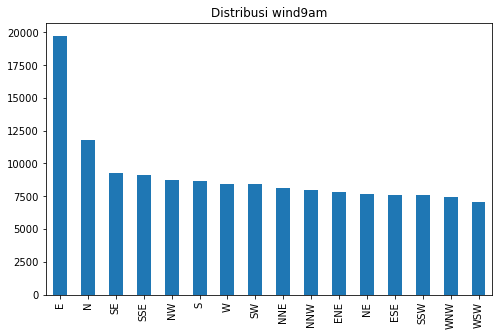

In [41]:
#melihat distribusi wind9am
plt.figure(figsize = (8, 5))
wind9am_count.plot(kind = "bar").set(title = "Distribusi wind9am")

# Data Preprocessing

In [ ]:
#Encoding RainToday dan RainTomorrow
le = preprocessing.LabelEncoder()

In [ ]:
#Encoding RainToday
data_set["RainToday"] = le.fit_transform(data_set["RainToday"])

In [ ]:
#encoding RainTomorrow
data_set["RainTomorrow"] = le.fit_transform(data_set["RainTomorrow"])

In [ ]:
#Encoding WindDir9am
data_set['WindDir9am']=le.fit_transform(data_set['WindDir9am'])

In [ ]:
#Encoding WindDir3pm
data_set['WindDir3pm']=le.fit_transform(data_set['WindDir3pm'])

In [ ]:
feature = ["Rainfall","Sunshine","WindDir9am","WindDir3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm","RainToday"]
target = ["RainTomorrow"]

In [ ]:
#Melihat dimensi featur
data_set[feature].shape

In [ ]:
#Melihat dimensi target
data_set[target].shape

# Preprocessing

In [ ]:
#saya menggunakan 70% data training dan 30% data test
X_train, X_test, y_train, y_test = train_test_split(data_set[feature], data_set[target], test_size=0.3, random_state=109)

# Pendefinisian Model

In [ ]:
#Membuat clasifier
clf = svm.SVC()

# Pelatihan Model

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = np.ravel(y_train)

In [ ]:
#pelatihan model dengan training set yang telah dibuat
clf.fit(X_train,y_train)

In [ ]:
#Membuat prediksi
y_pred = clf.predict(X_test)

# EValuasi Model

In [ ]:
#Model accuracy
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))

In [ ]:
#Model Precision
print("Precision : ",metrics.precision_score(y_test,y_pred))

#Model Recall
print("Recall : ",metrics.recall_score(y_test,y_pred))

# Kesimpulan
Kesimpulan yang dapat diambil dari model yang telah dibuat yaitu akurasi dari model yangdibuat menggunakan algoritma SVM (Support Vector Machine) sebesar 0.83 atau sekitar 83%, ini menunjukan bahwa model yang dibangun cukup akurat